# Open CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

house_csv = pd.read_csv('./housing_1.csv')
print(house_csv.shape)
print(house_csv)


# house_csv.hist(figsize=(20,15), bins=50)
# plt.show()

(20640, 10)
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_i

# Afficher les distributions statistiques et les corrélations

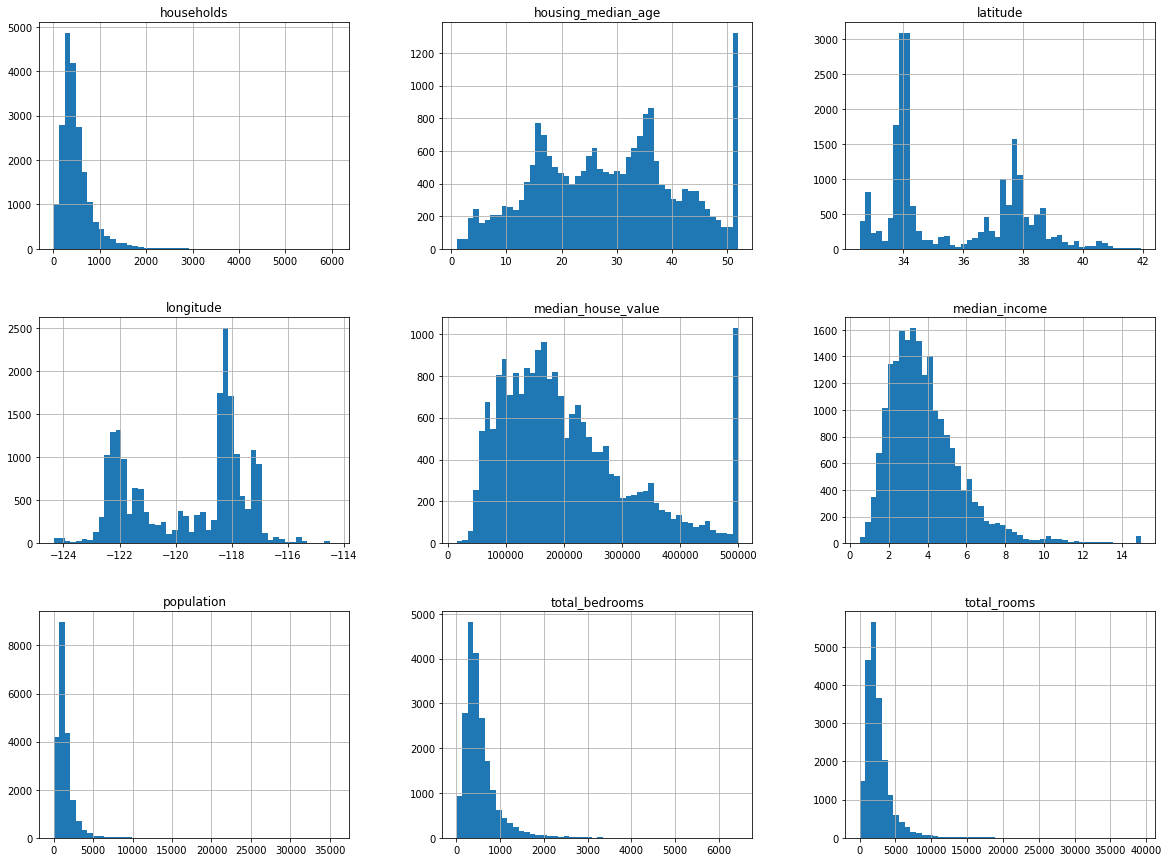

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [58]:
# Affichage des distributions
house_csv.hist(figsize=(20,15), bins=50)
plt.show()

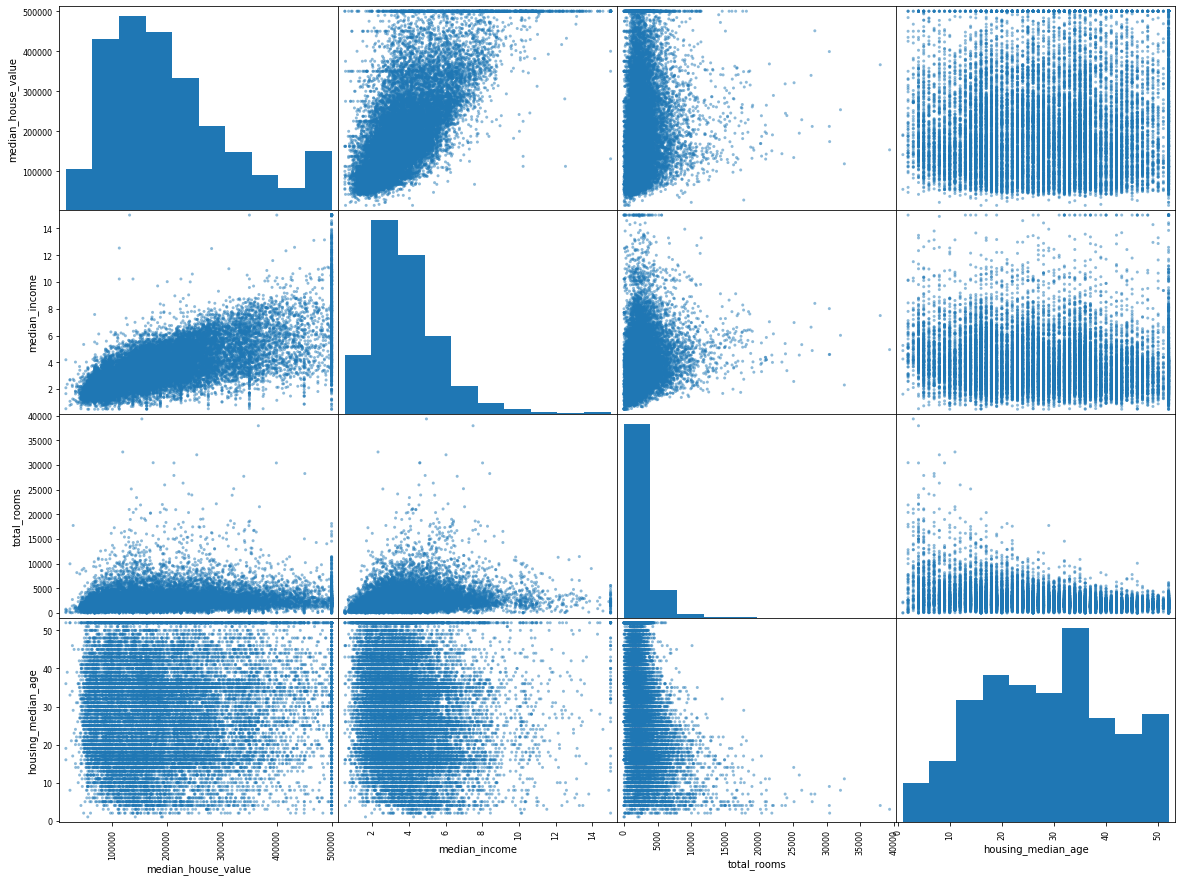

In [7]:
# Affichage des corrélations
corr_matrix = house_csv.corr()
# median_house_value est notre variable à expliquer/prédire
corr_matrix["median_house_value"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix
scatter_matrix(house_csv[[
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
    ]], figsize=(20,15))
plt.show()

# Enlever les lignes ayant des features manquantes

In [2]:
house_csv = house_csv.dropna()
print(house_csv.shape)

(20433, 10)


# Copy dataFrame, separate to X and Y

In [3]:
# Copy csv
X = house_csv.copy()
Y = X["median_house_value"]

# Nécessité de récupérer la colonne comme un array de colonnes
categories_columns = ["ocean_proximity"]
ocean_proximity= X[categories_columns]

del X["median_house_value"]
X = X.drop(columns=categories_columns)

print("X: ", X)
print("Y: ", Y)
print("ocean_proximity: ", ocean_proximity)

X:         longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  


# StandardScale X, and transform "ocean_proximity" to one_hot

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

x_scaler = StandardScaler()
one_hot_fitter = OneHotEncoder()


X_scaled = x_scaler.fit_transform(X)
one_hot_proximity = one_hot_fitter.fit_transform(ocean_proximity).toarray() # is sparse matrix, so we need to call "toarray" method

print("X_scaled:", X_scaled)
print("categories:", one_hot_fitter.categories_)
print("one_hot_proximity:", one_hot_proximity)
print("inverse one_hot:", one_hot_fitter.inverse_transform(one_hot_proximity))


X_scaled: [[-1.32731375  1.05171726  0.98216331 ... -0.97331952 -0.97683327
   2.34516291]
 [-1.32232256  1.04235526 -0.60621017 ...  0.86133924  1.67037262
   2.33263161]
 [-1.33230494  1.03767426  1.85576873 ... -0.81976943 -0.84342665
   1.78293943]
 ...
 [-0.82320322  1.77727236 -0.92388486 ... -0.36882637 -0.17377773
  -1.14317103]
 [-0.87311515  1.77727236 -0.84446619 ... -0.60356386 -0.39350628
  -1.05513604]
 [-0.83318561  1.74918635 -1.00330353 ... -0.03348711  0.07995643
  -0.78060586]]
categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
one_hot_proximity: [[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
inverse one_hot: [['NEAR BAY']
 ['NEAR BAY']
 ['NEAR BAY']
 ...
 ['INLAND']
 ['INLAND']
 ['INLAND']]


# Concaténer X et les valeurs one_hot

In [5]:
# StandardScaler et OneHotEncoder retournent des array et non des dataFrames
# De ce fait, on peut concaténer en tableau numpy
import numpy as np

X_merged = np.concatenate([np.array(X_scaled), np.array(one_hot_proximity)], axis=1)

# La version DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns= X.columns.to_list())
categories_df = pd.DataFrame(one_hot_proximity, columns= one_hot_fitter.categories_)
X_merged = pd.concat([X_scaled_df, categories_df], axis=1)
X_merged


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.0,0.0,0.0,1.0,0.0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.0,0.0,0.0,1.0,0.0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,0.0,0.0,0.0,1.0,0.0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.0,0.0,0.0,1.0,0.0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,0.0,1.0,0.0,0.0,0.0
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.0,1.0,0.0,0.0,0.0
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,0.0,1.0,0.0,0.0,0.0
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,0.0,1.0,0.0,0.0,0.0


# Observer en 2D la distribution des données

Nous allons d'abord faire une PCA pour réduire le nombre de features jusqu'à avoir 955 à 99% de variance, puis nous ferons une tSNE. Le but de la PCA est de d'accélérer la tSNE au plus possible

PCA took 0.0665132999420166 ms


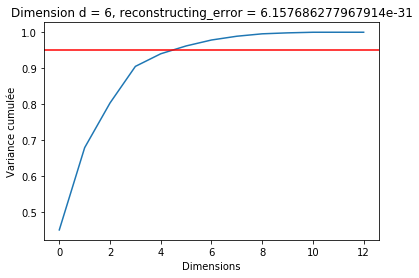

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
import time 

# L'erreur de reconstruction de la pca
def reconstructing_error(X_reduced, X_train, pca):
    X_reconstructed = pca.inverse_transform(X_reduced)
    return mean_squared_error(X_reconstructed, X_train)

def train_PCA(pca, X_train):
    start = time.time()
    pca.fit(X_train)
    end = time.time()
    print(f"PCA took {end - start} ms")

    cumsum = np.cumsum(pca.explained_variance_ratio_)
    d = np.argmax(cumsum >= 0.95) + 1

    error = reconstructing_error(pca.transform(X_train), X_train, pca)

    plt.figure()
    plt.xlabel("Dimensions")
    plt.ylabel("Variance cumulée")
    plt.title(f"Dimension d = {d}, reconstructing_error = {error}")
    plt.plot(cumsum)
    plt.axhline(y=0.95, color="r")

pca = PCA(n_components=13, svd_solver="randomized")
train_PCA(pca, X_merged)


In [19]:
pca = PCA(n_components=6, svd_solver="randomized")
X_merged_pca = pca.fit_transform(X_merged)

Starting training of TSNE
TSNE fitting took 128.53004622459412 ms
TSNE shape after reducing: (20433, 2)


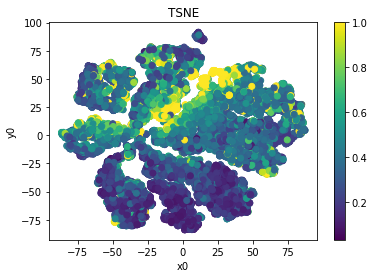

In [31]:
# un reducer est juste l'algo de réduction de dimension: PCA, TSNE ect
def train_reducer(model, name, X_train):
    print(f"Starting training of {name}")
    start = time.time()
    X_embedded = model.fit_transform(X_train)
    end = time.time()

    print(f"{name} fitting took {end - start} ms")
    print(f"{name} shape after reducing: {X_embedded.shape}")
    return X_embedded

def visualize_reduction(X_reduced, y, name):
    x0 = X_reduced[:, 0]
    x1 = X_reduced[:, 1]

    plt.figure()
    plt.xlabel("x0")
    plt.ylabel("y0")
    plt.title(f"{name}")
    # c should be an array of string or value between 0 and 1
    plt.scatter(x0, x1, c=np.array(y)/np.max(y))
    plt.colorbar()

def train_and_visualize(model, name, X_train, y_train):
    X_reduced = train_reducer(model, name, X_train)
    visualize_reduction(X_reduced, y_train, name)

models_to_train = [
    (TSNE(n_components=2, random_state=42), "TSNE"),
    # (PCA(n_components=2, svd_solver="randomized"), "PCA"),
]

for model, name in models_to_train:
    train_and_visualize(model, name, X_merged_pca, Y)


# Récupérer le CSV avec l'API DATA, voir api_data.ipynb pour plus de complexité

In [6]:
import tensorflow as tf

def disp_dataset(ds, limit=None, print_elements=True):
    count = 0

    for x in ds:
        count += 1
        if print_elements:
            print(x)
        if limit is not None and count >= limit:
            break
    print(f"Count:{count}")

# Un dataset n'accepte pas des lignes ayant des données de différents types. Il faut donc séparer les données float et les données catégoriques. Cela vient du fait qu'une ligne = 1 tenseur, et un tenseur ne peut accepter qu'un seul type de données.

In [66]:
# Il y a 9 colonnes numériques et 1 colonne catégorique

# defs = [0.] * 9 + [tf.constant([], dtype=tf.string)]
# dataset = tf.data.experimental.CsvDataset(['./housing_1.csv'], record_defaults=defs, header=True)

dataset = tf.data.experimental.make_csv_dataset(['./housing_1.csv'], batch_size=1)
# retourne un dataset d'objet dictionnaire clé -> tenseur

# Nous allons séparer les colonnes numériques, catégoriques, et la colonne à prédire
columns = [list(l.keys()) for l in dataset.take(1)][0]
categories_columns = ["ocean_proximity"]
y_column = "median_house_value"
X_columns = [s for s in columns if s not in categories_columns and s != y_column]

def separate_dico_features(dico):
    y = dico[y_column]
    # on fusionne les 9 tenseurs de taille 1 pour avoir 1 seul tenseur de taille 9
    categories = tf.stack([
        dico[c] for c in categories_columns
    ])
    numericals = tf.stack([
        dico[c] for c in X_columns
    ])

    categories = tf.reshape(categories, shape=(1,1))
    numericals = tf.reshape(numericals, shape=(1,8))

    return ((numericals, categories), y)

dataset = dataset.map(separate_dico_features)

disp_dataset(dataset, limit=3)


((<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[-122.07  ,   37.72  ,   26.    , 3204.    ,  477.    , 1411.    ,
         484.    ,    5.4834]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=string, numpy=array([[b'NEAR BAY']], dtype=object)>), <tf.Tensor: shape=(1,), dtype=float32, numpy=array([295200.], dtype=float32)>)
((<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[-118.1   ,   33.93  ,   33.    , 1474.    ,  325.    , 1205.    ,
         335.    ,    3.1397]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=string, numpy=array([[b'<1H OCEAN']], dtype=object)>), <tf.Tensor: shape=(1,), dtype=float32, numpy=array([166800.], dtype=float32)>)
((<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[-118.46  ,   34.28  ,   23.    , 1663.    ,  302.    , 1242.    ,
         283.    ,    5.5931]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=string, numpy=array([[b'<1H OCEAN']], dtype=object)>), <tf.Tensor: shape=(1,), dtype=float32, numpy=array([217600.], d

# Enlever les NaN du dataset

In [67]:
test = [tf.constant(0.), tf.constant(1.)]
tf.math.is_nan(test)

def filter_not_nan(inputs, y):
    numericals, categories = inputs

    nan_in_numericals = tf.reduce_any(tf.math.is_nan(numericals))
    # nan_in_categories = tf.reduce_any(tf.math.is_nan(categories))
    nan_in_categories = False
    nan_in_y = tf.reduce_any(tf.math.is_nan(y))

    has_nan = nan_in_numericals or nan_in_categories or nan_in_y
    return not has_nan

dataset = dataset.filter(filter_not_nan)

disp_dataset(dataset.take(2), print_elements=True)

((<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[-118.15  ,   34.04  ,   33.    ,  818.    ,  195.    ,  664.    ,
         198.    ,    2.1944]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=string, numpy=array([[b'<1H OCEAN']], dtype=object)>), <tf.Tensor: shape=(1,), dtype=float32, numpy=array([203300.], dtype=float32)>)
((<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[-1.2205e+02,  3.7630e+01,  5.0000e+00,  3.7850e+03,  9.3600e+02,
         2.2400e+03,  7.9200e+02,  3.2829e+00]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=string, numpy=array([[b'NEAR BAY']], dtype=object)>), <tf.Tensor: shape=(1,), dtype=float32, numpy=array([162500.], dtype=float32)>)
Count:2


# Mélanger et Séparer en set de train/validation/test

In [68]:
dataset = dataset.shuffle(10000)

# Entrainer un Normalizer et l'ajouter à la pipeline data (ou alors ajouter une couche NormalizationLayer au réseau de neurones)

In [69]:
# Testing the Normalization layer

from tensorflow.keras.layers.experimental.preprocessing import Normalization

def echantillon(dataset, size=100):
    return dataset.take(size)

X_normalizer = ds_train.map(lambda X,y: X[0])
normalizer = Normalization()
normalizer.adapt(echantillon(X_normalizer))

example = normalizer([x for x in X_normalizer.take(1)])
print(example)

tf.Tensor(
[[[[-0.56633216]
   [-0.45241767]
   [-0.45036376]
   [ 1.3809915 ]
   [-0.13891385]
   [ 0.42946354]
   [-0.15609214]
   [-0.4742465 ]]

  [[-0.56796783]
   [-0.45013222]
   [-0.4518575 ]
   [ 1.0471351 ]
   [-0.1956769 ]
   [ 0.23378038]
   [-0.21210831]
   [-0.4759561 ]]

  [[-0.56560767]
   [-0.45249233]
   [-0.4481231 ]
   [ 0.23975544]
   [-0.32936883]
   [-0.09783532]
   [-0.3420658 ]
   [-0.4764598 ]]

  [[-0.5673927 ]
   [-0.4508044 ]
   [-0.44961685]
   [ 0.28083396]
   [-0.32712817]
   [-0.07468197]
   [-0.3383314 ]
   [-0.47628912]]

  [[-0.56958854]
   [-0.4493629 ]
   [-0.46679515]
   [ 1.130039  ]
   [-0.22032401]
   [ 0.2531993 ]
   [-0.22779283]
   [-0.47411713]]

  [[-0.56623507]
   [-0.45277616]
   [-0.44140115]
   [ 1.6072967 ]
   [ 0.03735036]
   [ 0.4936954 ]
   [ 0.0059813 ]
   [-0.4755399 ]]

  [[-0.56940186]
   [-0.44805586]
   [-0.46604827]
   [ 1.0732759 ]
   [-0.18820807]
   [ 0.3846506 ]
   [-0.1874612 ]
   [-0.4756561 ]]

  [[-0.56772137]
   [-0

# Transformer les valeurs catégoriques en one_hot

In [70]:
vocab = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
indices = tf.range(len(vocab), dtype=tf.int64)
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

# Example:
# on rappelle que x est un tuple (numerical, categorical) où categorical est un tenseur de taille (n_echantillon, n_colonne_categorique). Ici on a qu'une colonne catégorique
category = [x[1][:, 0] for (x,y) in dataset.take(5)]
category = tf.stack(category)
print(category)
indice = table.lookup(category)
one_hot = tf.one_hot(indice, depth=len(vocab) + num_oov_buckets)

print("Indice:", indice)
print("One_hot:", one_hot)

# y_train = preprocessed_dataset.map(lambda x,y:y)
# y_train_indices = y_train.map(lambda y: table.lookup(y))
# y_train_categorical = y_train_indices.map(lambda y: tf.one_hot(y, depth=len(vocab) + num_oov_buckets))
# disp_dataset(y_train_categorical, limit=2)

tf.Tensor(
[[b'INLAND']
 [b'<1H OCEAN']
 [b'<1H OCEAN']
 [b'<1H OCEAN']
 [b'INLAND']], shape=(5, 1), dtype=string)
Indice: tf.Tensor(
[[1]
 [0]
 [0]
 [0]
 [1]], shape=(5, 1), dtype=int64)
One_hot: tf.Tensor(
[[[0. 1. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0.]]], shape=(5, 1, 7), dtype=float32)


# Normalizer et categoriser notre dataset

In [71]:
def preprocess(inputs, y):
    numericals, categoricals = inputs

    numericals = normalizer(numericals)
    numericals = tf.reshape(numericals, shape=(1,8))

    indice = table.lookup(categoricals) # il n'y a qu'une seule colonne de toute façon. S'il y en avait plusieurs, il faudrait utiliser plusieurs table lookup, faire ça colonne par colonne et concaténer le tout
    one_hot = tf.one_hot(indice, depth=len(vocab) + num_oov_buckets)

    return (numericals, one_hot), y

dataset = dataset.map(preprocess)
disp_dataset(dataset, limit=2)

# Pour numericals, nous avons une taille (n, 8) car nous avons 8 features numériques.
# Pour categoricals, nous avons une taille (n, n_categories, n_vocab).  Ici nous n'avons qu'une seule colonne catégorique. Il faut remarquer que n_vocab dépend de la colonne. Il faudra faire attention car il est probable qu'il y aura des conflits de taille avec plusieurs colonnes catégoriques.

# Une solution à ça serait simplement de tout concaténer en colonne, et d'avoir une taille (n, somme des n_vocab)

((<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[-0.56611556, -0.45281348, -0.4600732 ,  1.6326908 , -0.06945381,
         0.8200829 , -0.07020068, -0.47348022]], dtype=float32)>, <tf.Tensor: shape=(1, 1, 7), dtype=float32, numpy=array([[[1., 0., 0., 0., 0., 0., 0.]]], dtype=float32)>), <tf.Tensor: shape=(1,), dtype=float32, numpy=array([240400.], dtype=float32)>)
((<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[-0.5661603 , -0.45270148, -0.4645545 ,  2.9770787 ,  0.13593881,
         1.6087905 ,  0.09187276, -0.47374734]], dtype=float32)>, <tf.Tensor: shape=(1, 1, 7), dtype=float32, numpy=array([[[1., 0., 0., 0., 0., 0., 0.]]], dtype=float32)>), <tf.Tensor: shape=(1,), dtype=float32, numpy=array([275100.], dtype=float32)>)
Count:2


In [ ]:
test_size = 1000

ds_test = dataset.take(test_size)
ds_train = dataset.skip(test_size)
ds_val = ds_train.take(test_size)
ds_train = ds_train.skip(test_size)

def batch_dataset(ds):
    return ds.batch(32).prefetch(1)

ds_train = batch_dataset(ds_train)
ds_test = batch_dataset(ds_test)
ds_val = batch_dataset(ds_val)

disp_dataset(ds_train.take(1))